**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [61]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [62]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [63]:
model = ExchangeEconomyClass()

# Question 1

Firstly we find all the pareto improvement allocations by using the following code. The allocations we find is the different combinations of X1A and X2A that leave both players as least as well off as they were when consuming their endowment. We find these allocations by using the functions for utility and consumption. We only show the first 5 in the first section.

In [64]:
import numpy as np

ua = model.utility_A(model.par.w1A, model.par.w2A)
ub = model.utility_B(1-model.par.w1A, 1-model.par.w2A)
N = 75

list=[]

for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        utilia = model.utility_A(x1A, x2A)
        utilib = model.utility_B(x1B, x2B)
        if utilia >= ua and utilib >= ub:
            list.append((x1A,x2A))

print(list[:5])
x, y = zip(*list)

[(0.08, 0.9600000000000001), (0.09333333333333334, 0.88), (0.09333333333333334, 0.8933333333333334), (0.09333333333333334, 0.9066666666666667), (0.09333333333333334, 0.92)]


Now when we have found all the pareto improvement points, it is possible to show them in an Edgeworth box. In he first part of the code we specify the total endownment of each good. Secondly we set up the figure and create the design. After that we plot in the pareto improvemtent points in the scatter and we also illustrate the initial endowment.

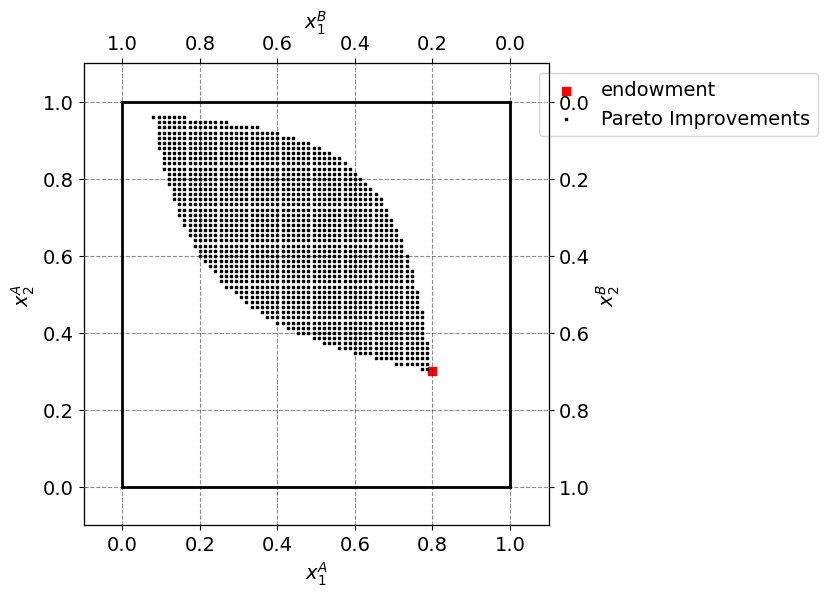

In [65]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(x,y,marker='s',color='black',label='Pareto Improvements', s=0.8)

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

In this question we want to calculate the error in the market clearing condition s. Firstly we define conditions for the price of good 1. We then use the code that we have created in the ExchangeEconomy file to calculate the errors and we print them. We use the code in the end to illustrate the total market clearing error against p1 values and calculate the error for the market clearing condition.

          p1      eps1      eps2
0   0.500000  0.533333 -0.266667
1   0.526667  0.475949 -0.250667
2   0.553333  0.424096 -0.234667
3   0.580000  0.377011 -0.218667
4   0.606667  0.334066 -0.202667
..       ...       ...       ...
71  2.393333 -0.363231  0.869333
72  2.420000 -0.365840  0.885333
73  2.446667 -0.368392  0.901333
74  2.473333 -0.370889  0.917333
75  2.500000 -0.373333  0.933333

[76 rows x 3 columns]


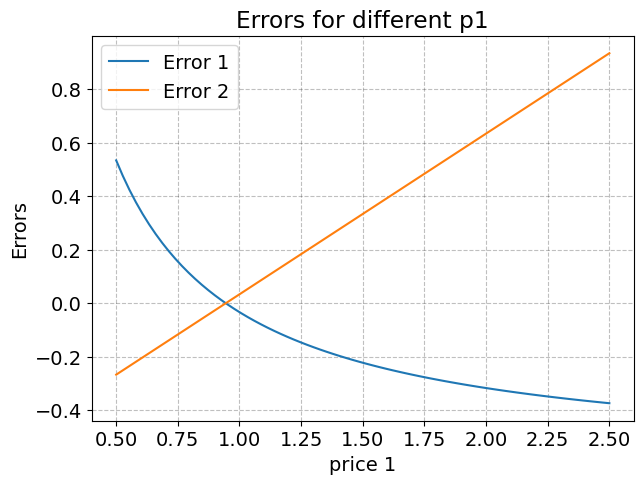

When p1 is 0.953, eps1 is -0.006 and eps2 is 0.005


In [66]:
import matplotlib.pyplot as plt

# Defining p1:
p1 = [(0.5 + 2*i/75) for i in range(76)]

# Caluculating the errors:
errors = [model.check_market_clearing(x) for x in p1]
eps1 = [x[0] for x in errors]
eps2 = [x[1] for x in errors]

# Importing Pandas:
import pandas as pd

# Creating dataframe:
df = pd.DataFrame({'p1': p1, 'eps1': eps1, 'eps2': eps2})
print(df)

# Plotting the figure:
plt.figure(figsize=(7, 5))
plt.plot(p1, eps1, label='Error 1')
plt.plot(p1, eps2, label='Error 2')
plt.xlabel('price 1')
plt.ylabel('Errors')
plt.title('Errors for different p1')
plt.legend()
plt.grid(True)
plt.show()

# We now find the market clearing eps
market_clearing_eps = df['p1'].sub(0.9533333333).abs().idxmin()

# Get eps1 and eps2 corresponding to p1 = 0.953
eps1_953 = df.loc[market_clearing_eps, 'eps1']
eps2_953 = df.loc[index_953, 'eps2']

print(f'When p1 is 0.953, eps1 is {eps1_953:.3f} and eps2 is {eps2_953:.3f}')


# Question 3

The market clearing price is the value of price 1 that makes the errors as small as possible. To find the market clearing price, we use code to calculate the price of good 1 where error of good 1 is the closest to zero. We find that the price then has to be 0.953.

In [67]:
# Epsilon close to zero
eps_zero = np.abs(eps1).argmin()

# Finding epsilon 1 closest to zero
market_clearing_price = p1[eps_zero]

# Printing the market clearing price
print(f"The market clearing price is {market_clearing_price:.3f}.")

The market clearing price is 0.953.


# Question 4A

We find the allocation if only prices in P1 can be chosen. We start by iterating over a range of prices, calculating the demand for goods from Agent B at each price, and then determining the allocation of goods for Agent A to ensure market balance. After computing the utility for Agent A, we compare it with the maximum utility found so far and updates the results if a higher utility is discovered. Finally, we print out the optimal allocation and utility values for Agent A, along with corresponding details for Agent B. In the end we show the utility for agent A depending on the price of good 1

In [68]:
# Define the number of price points
num_prices = 75
price_range = np.linspace(0.5, 2.5, num_prices + 1)

# Initialize variables
best_results = {"Best Price for Agent A": np.nan,
                "Maximum Utility of Agent A": -np.inf,
                "Allocation of Good 1 for Agent A": np.nan,
                "Allocation of Good 2 for Agent A": np.nan,
                "Allocation of Good 1 for Agent B": np.nan,
                "Allocation of Good 2 for Agent B": np.nan}

# Iterate over prices
for current_price in price_range:
    demand_B_good1, demand_B_good2 = model.demand_B(current_price)[0], model.demand_B(current_price)[1]
    allocation_A_good1, allocation_A_good2 = 1 - demand_B_good1, 1 - demand_B_good2
    utility_A = model.utility_A(allocation_A_good1, allocation_A_good2)
    
    # Update best results
    if utility_A > best_results["Maximum Utility of Agent A"]:
        best_results["Best Price for Agent A"] = current_price
        best_results["Maximum Utility of Agent A"] = utility_A
        best_results["Allocation of Good 1 for Agent A"] = allocation_A_good1
        best_results["Allocation of Good 2 for Agent A"] = allocation_A_good2
        best_results["Allocation of Good 1 for Agent B"] = demand_B_good1
        best_results["Allocation of Good 2 for Agent B"] = demand_B_good2

print("The resulting allocation maximizing agent A's utility with prices in P1 is:")
print(f"Optimal xA1: {best_results['Allocation of Good 1 for Agent A']:.3f}")
print(f"Optimal xA2: {best_results['Allocation of Good 2 for Agent A']:.3f}")
print(f"Utility for agent A: {best_results['Maximum Utility of Agent A']:.3f}")
print(f"Price 1: {best_results['Best Price for Agent A']:.3f}")
print(f"Optimal xB1: {best_results['Allocation of Good 1 for Agent B']:.3f}")
print(f"Optimal xB2: {best_results['Allocation of Good 2 for Agent B']:.3f}")

The resulting allocation maximizing agent A's utility with prices in P1 is:
Optimal xA1: 0.619
Optimal xA2: 0.641
Utility for agent A: 0.634
Price 1: 1.887
Optimal xB1: 0.381
Optimal xB2: 0.359


/Users/madssorstrom/projects-2024-malik-og-mads-4/inauguralproject/ExchangeEconomy.py:20: RuntimeWarning: invalid value encountered in scalar power
  return x1A ** self.par.alpha * x2A ** (1 - self.par.alpha)


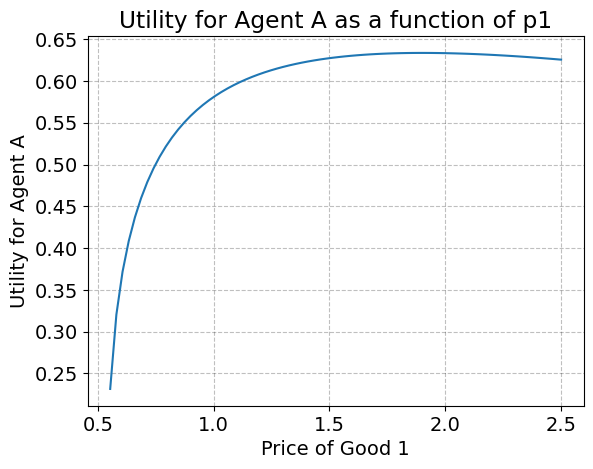

In [69]:
import matplotlib.pyplot as plt

# Defining the number of price points
num_prices = 75
price_range = np.linspace(0.5, 2.5, num_prices + 1)

# Initializing variables
utility_values = []

# Iterating over prices
for current_price in price_range:
    demand_B_good1, demand_B_good2 = model.demand_B(current_price)[0], model.demand_B(current_price)[1]
    allocation_A_good1, allocation_A_good2 = 1 - demand_B_good1, 1 - demand_B_good2
    utility_A = model.utility_A(allocation_A_good1, allocation_A_good2)
    utility_values.append(utility_A)

# Plotting utility values against price range
plt.plot(price_range, utility_values)
plt.title("Utility for Agent A as a function of p1")
plt.xlabel("Price of Good 1")
plt.ylabel("Utility for Agent A")
plt.grid(True)
plt.show()


# Question 4B

Now the price can be any positive number. We start by defining the function to calculate the utility for agent A. We the find the optimal price and then calculate the corresponding allocations for both Agent A and Agent B and find the utility for Agent A. Finally, we print out the optimal allocations and utility for Agent A.

In [87]:
# Defining a function to calculate utility for Agent A
def calculate_utility(price):
    demand_A = 1 - np.array(model.demand_B(price))
    if any(demand_A < 0):
        return 0 
    return -model.utility_A(*demand_A)

# Finding the optimal price that maximizes Agent A's utility
optimal_price = optimize.minimize_scalar(calculate_utility).x

# Calculating allocations and maximum utility
allocation_A = 1 - np.array(model.demand_B(optimal_price))
allocation_B = np.array(model.demand_B(optimal_price))
max_utility = model.utility_A(*allocation_A)

# Store results in a dictionary
iteration_4b_results = {
    "Optimal xA1": allocation_A[0], 
    "Optimal xA2": allocation_A[1],  
    "Utility for Agent A": max_utility,  
    "Price 1": optimal_price, 
    "Optimal xB1": allocation_B[0], 
    "Optimal xB2": allocation_B[1]  
}

# Printing the results
for key, value in iteration_4b_results.items():
    if isinstance(value, float):
        print(f"{key}: {value:.3f}")
    else:
        print(f"{key}: {value}")


Optimal xA1: 0.621
Optimal xA2: 0.640
Utility for Agent A: 0.634
Price 1: 1.899
Optimal xB1: 0.379
Optimal xB2: 0.360


# Question 5A

We now find the allocation if the choice set is restricted to C. We first set up the restriction C. After that we create arrays for the new allocations and then finding the corresponding utility and maximize the utility. After the maximum utility is found, it is posible find the allocation.

In [88]:
x_1AA = np.linspace(0,1,N+1)
x_2AA = np.linspace(0,1,N+1)

# Creating C
C = [
    (new_x1A, new_x2A) for new_x1A in x_1AA for new_x2A in x_2AA 
    if model.utility_A(new_x1A, new_x2A) >= model.utility_A(model.par.w1A, model.par.w2A) 
    and model.utility_B(1 - new_x1A, 1 - new_x2A) >= model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)
]

# Creating arrays of all points for new_x1A,new_x2A in C
x_1aa = np.array([point[0] for point in C])
x_2aa = np.array([point[1] for point in C])

# Finding the corresponding utility and maximum
utility_aa=model.utility_A(x_1aa,x_2aa)
utility_max=utility_aa.max()

# Finding the indices of the maximum utility
indice_aa = utility_aa==utility_max

# Finding the allocation
allo_a1 = x_1aa[indice_aa][0]
allo_a2 = x_2aa[indice_aa][0]

## Summing up
print(f'Agent A allocation if choice set is restricted to C x1A = {allo_a1:.3f} and x2B = {allo_a2:.3f}')
print(f"Agent A utility = {model.utility_A(allo_a1,allo_a2):.3f}")

Agent A allocation if choice set is restricted to C x1A = 0.560 and x2B = 0.853
Agent A utility = 0.742


# Question 5B

Now we find the allocation if no further restrictions are imposed. It is done by firstly defining the function for utility A. We also derfine the constraint function. Then we set the bounds because it has to be between 0 and 1. We use the initial guess to find the allocation that maximize the utility for agent A. When the maximum is found, we call them opti_x1a and opti_x2a. 

In [11]:
from scipy import optimize
model = ExchangeEconomyClass()


# Defining utility A
def utility_A(x):
    return -model.utility_A(x[0], x[1])

# Defining the constraint function
def constraint(x):
    x1B = 1 - x[0]
    x2B = 1 - x[1]
    utility_BB = model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)
    return model.utility_B(x1B, x2B) - utility_BB

cons = [{'type': 'ineq', 'fun': constraint}]

bounds = ((0,1), (0,1))

initial_guess = [0.1,0.1]

result = optimize.minimize(utility_A, initial_guess, method='SLSQP', bounds=bounds, constraints=cons)

opti_x1a = result.x[0]
opti_x2a = result.x[1]


# Printing the results
print(f'Agent A allocation if no further restrictions are imposed is x1A ={opti_x1a:.3f} and x2A = {opti_x2a:.3f}')
print(f"Agent A utility = {model.utility_A(opti_x1a,opti_x2a):.3f}")

Agent A allocation if no further restrictions are imposed is x1A =0.576 and x2A = 0.844
Agent A utility = 0.743


# Question 6A

Now we have to maximize the sum of the two agents' utility. We start by setting up our objective function. After that we make an initial guess for the allocation and set up the bounds. We then maximize the objective function to maximize the sum of the utilities. We can now find the optimal allocation for agent A and B. 

In [24]:
# Objective function to maximize the sum of utilities
def objective(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(model.utility_A(xA1, xA2) + model.utility_B(xB1, xB2))

# Initial guess for xA1 and xA2
x0 = [0.5, 0.5]

# Setting bounds for xA1 and xA2
bounds = ((0, 1), (0, 1))

# Optimization to maximize the sum of utilities
result = minimize(objective, x0, bounds=bounds)

# Finding the optimal allocation for agent A and B
xA_optimal = result.x
xB_optimal = (1 - xA_optimal[0], 1 - xA_optimal[1])

# Calculating the utility for A and B
util_A = model.utility_A(xA_optimal[0], xA_optimal[1])
util_B = model.utility_B(xB_optimal[0], xB_optimal[1])

# Print the optimal allocation for A and B with their utility values
print("The resulting allocation maximizing aggregate utility is:")
print(f"x1A = {xA_optimal[0]:.3f}, x2A = {xA_optimal[1]:.3f}")
print(f"x1B = {xB_optimal[0]:.3f}, x2B = {xB_optimal[1]:.3f}")
print(f"Utility for Agent A: {util_A:.3f}")
print(f"Utility for Agent B: {util_B:.3f}")
print(f"Aggregate utility: {util_A + util_B:.3f}")


The resulting allocation maximizing aggregate utility is:
x1A = 0.333, x2A = 0.667
x1B = 0.667, x2B = 0.333
Utility for Agent A: 0.529
Utility for Agent B: 0.529
Aggregate utility: 1.058


# Question 6B

We illustrate the different allocations that we have found through this assignment. TWe begin by setting up a figure with two subplots, representing the allocation of goods for the two agents. The initial endowment is then plotted. Then, the different allocations and the pareto improvements are plotted. Finally, we add the plot limits and legend.

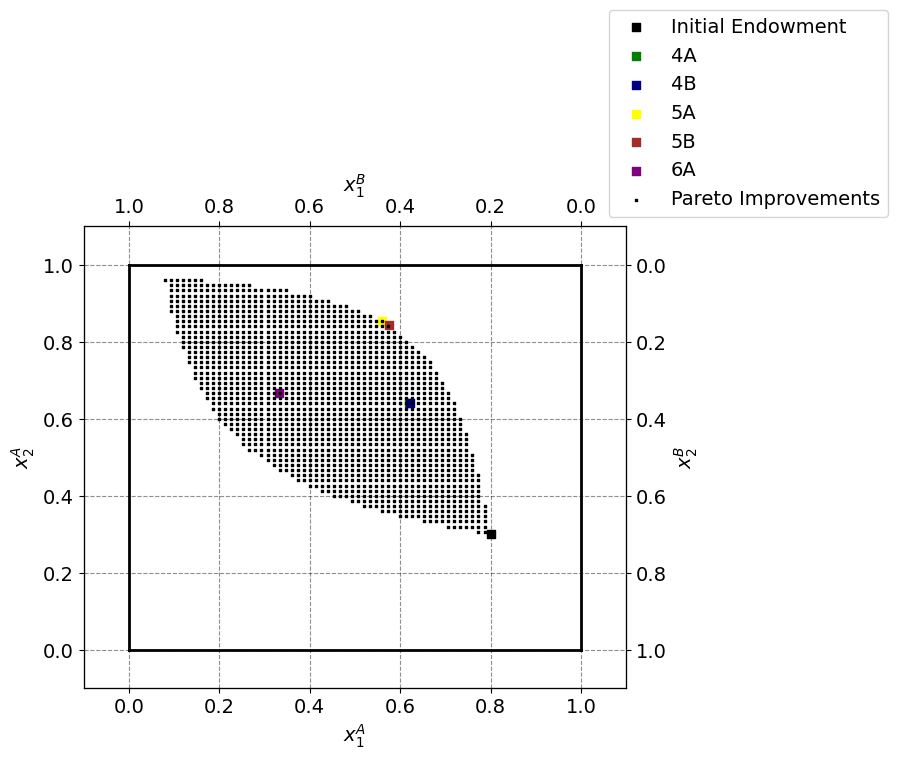

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Define total endowment
total_endowment_x1 = 1.0
total_endowment_x2 = 1.0

# Setting up the figure
fig = plt.figure(frameon=False, figsize=(7, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")
temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")

# Plotting initial endowment
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='Initial Endowment')

# Plotting the different allocations
ax_A.scatter(best_results["Allocation of Good 1 for Agent A"], best_results["Allocation of Good 2 for Agent A"], 
             marker='s', color='green', label='4A')
ax_A.scatter(iteration_4b_results["Optimal xA1"], iteration_4b_results["Optimal xA2"], 
             marker='s', color='navy', label='4B')
ax_A.scatter(allo_a1, allo_a2, marker='s', color='yellow', label='5A')
ax_A.scatter(opti_x1a, opti_x2a, marker='s', color='brown', label='5B')
ax_A.scatter(0.333, 0.667, marker='s', color='purple', label='6A')
ax_A.scatter(x, y, marker='s', color='black', label='Pareto Improvements', s=0.8)

# Plotting limits
ax_A.plot([0, total_endowment_x1], [0, 0], lw=2, color='black')
ax_A.plot([0, total_endowment_x1], [total_endowment_x2, total_endowment_x2], lw=2, color='black')
ax_A.plot([0, 0], [0, total_endowment_x2], lw=2, color='black')
ax_A.plot([total_endowment_x1, total_endowment_x1], [0, total_endowment_x2], lw=2, color='black')
ax_A.set_xlim([-0.1, total_endowment_x1 + 0.1])
ax_A.set_ylim([-0.1, total_endowment_x2 + 0.1])
ax_B.set_xlim([total_endowment_x1 + 0.1, -0.1])
ax_B.set_ylim([total_endowment_x2 + 0.1, -0.1])

# Add legend
ax_A.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.5, 1.0))

plt.show()

# Question 7

We draw a set W with 50 elements by using the first line of code and then extract the x and y coordinates. We then make a figure to illustrate the 50 elements.

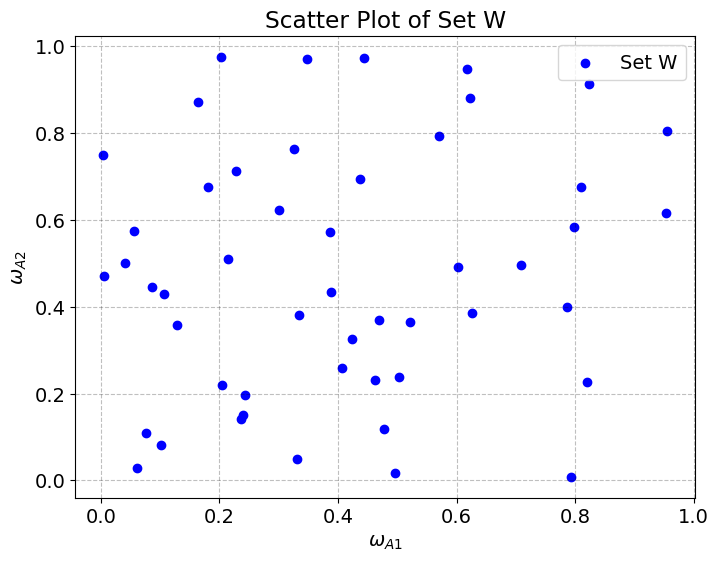

In [120]:
# Drawing a set W with 50 elements
W = np.random.rand(50, 2)

# Extracting the x and y coordinates
x_coords = W[:, 0]
y_coords = W[:, 1]

# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color='blue', label='Set W')
plt.title('Scatter Plot of Set W')
plt.xlabel('$\omega_{A1}$')
plt.ylabel('$\omega_{A2}$')
plt.legend()
plt.grid(True)
plt.show()

# Question 8

The code we use generates random endowment levels for agents A and B, then iterates through each combination of these endowments. For each combination, we calculate the market equilibrium allocation for agent A using optimization. Finally, we plot these allocations along with endowment points in an Edgeworth box, showing the equilibrium distribution of goods between the two agents.

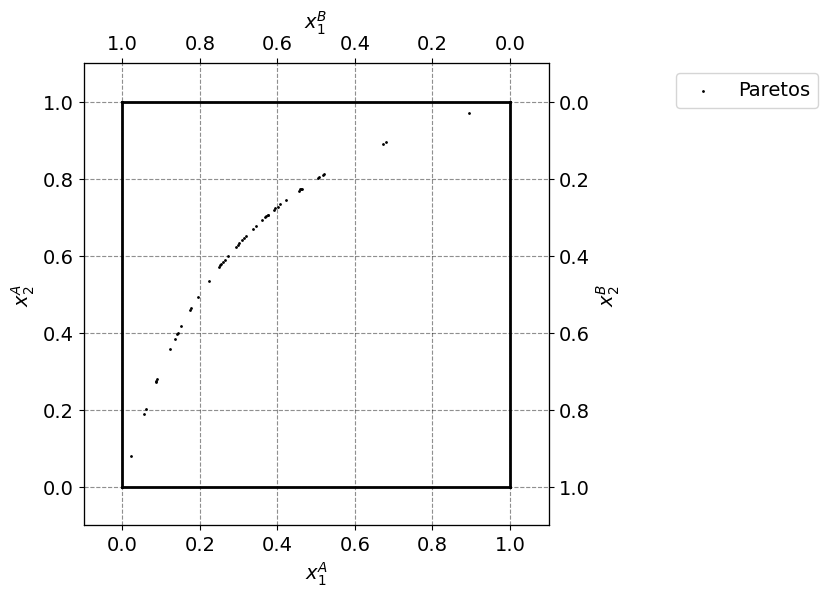

In [123]:
np.random.seed(4444)
N2 = 50

w1A = np.random.uniform(low=0, high=1, size=N2)
w2A = np.random.uniform(low=0, high=1, size=N2)

wlist = (zip(w1A, w2A))

initial_guess=1
bounds=[(0,np.inf)]

newxlist=[]
for w1A, w2A in wlist:
    res = optimize.minimize(
        lambda x: np.abs(model.marketclearnew(x,w1A,w2A)),initial_guess,
        method='Nelder-Mead',bounds=bounds
    )
    newxlist.append(tuple(map(float, model.newdemand_A(res.x[0],w1A,w2A))))

newx1list, newx2list = zip(*newxlist)

w1bar = 1.0
w2bar = 1.0

# Setting up the figure
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.scatter(newx1list,newx2list,marker='o',color='black',s=1,label='Paretos')

# Setting the limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));